In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
cmt_df=pd.read_csv("commits_new.csv",infer_datetime_format=True)

In [3]:
cmt_df.head(7)

,cmt_id,repo_id,cmt_commit_hash,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_author_affiliation,cmt_committer_name,cmt_committer_raw_email,...,cmt_date_attempted,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
0,34304725,25433,0597b8c0eea09f494d2723c12e0ec4336ff148d4,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-06-22,NaN,GitHub,noreply@github.com,...,2019-06-22 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-06-22 15:37:20+02,2019-06-22 15:37:20+02
1,34304726,25433,689593cfdc260b353fb54b6e4952ac387b75be01,Georg J.P. Link,linkgeorg@gmail.com,linkgeorg@gmail.com,2019-07-29,NaN,GitHub,noreply@github.com,...,2019-07-29 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-29 20:49:46+02,2019-07-29 20:49:46+02
2,34304727,25433,a77fb07ec053183bd2d71e6a751e9e53e7a4cd29,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:29:20+02,2019-08-02 13:29:20+02
3,34304728,25433,1465ca8c219783adcdbd90673a728c9a43c45bea,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-26,NaN,GitHub,noreply@github.com,...,2019-03-26 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-26 11:31:18+02,2019-03-26 11:31:18+02
4,34304729,25433,f2757c9ac4ba2f056fc76d52636c17aa5beba48e,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:27:38+02,2019-08-02 13:27:38+02
5,34304730,25433,c93694c12c7c043f1a86152aff531e2a7ee887a1,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-25,NaN,GitHub,noreply@github.com,...,2019-03-25 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-25 15:16:32+02,2019-03-25 15:16:32+02
6,34304731,25433,625954c529b9a9ba104cb97ce5b7a8946430b66b,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-07-24,NaN,GitHub,noreply@github.com,...,2019-07-24 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-24 09:45:58+02,2019-07-24 09:45:58+02


In [4]:
cmt_df.columns = cmt_df.columns.str.strip()
cmt_df.columns

Index(['cmt_id', 'repo_id', 'cmt_commit_hash', 'cmt_author_name',
       'cmt_author_raw_email', 'cmt_author_email', 'cmt_author_date',
       'cmt_author_affiliation', 'cmt_committer_name',
       'cmt_committer_raw_email', 'cmt_committer_email', 'cmt_committer_date',
       'cmt_committer_affiliation', 'cmt_added', 'cmt_removed',
       'cmt_whitespace', 'cmt_filename', 'cmt_date_attempted',
       'cmt_ght_author_id', 'cmt_ght_committer_id', 'cmt_ght_committed_at',
       'tool_source', 'tool_version', 'data_source', 'data_collection_date',
       'cmt_author_timestamp', 'cmt_committer_timestamp'],
      dtype='object')

In [5]:
cmt_df.describe()

,cmt_id,repo_id,cmt_author_affiliation,cmt_committer_affiliation,cmt_added,cmt_removed,cmt_whitespace,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at
count,2.094600e+04,20946.000000,0.0,0.0,20946.000000,20946.000000,20946.000000,0.0,0.0,0.0
mean,3.431520e+07,25430.252506,NaN,NaN,110.478516,108.184904,10.996945,NaN,NaN,NaN
std,6.046734e+03,0.645216,NaN,NaN,2170.329135,2450.196854,210.401233,NaN,NaN,NaN
min,3.430472e+07,25430.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,3.430996e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
50%,3.431520e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
75%,3.432043e+07,25430.000000,NaN,NaN,14.000000,7.000000,2.000000,NaN,NaN,NaN
max,3.432567e+07,25434.000000,NaN,NaN,122933.000000,202084.000000,11071.000000,NaN,NaN,NaN


In [6]:
#1 EDA and Preprocessing
#27- Columns
#Dropping cmt_id, repo_id, cmt_commit_hash, cmt_author-affiliation,  cmt_committer_affiliation,"cmt_ght_author_id"

In [7]:
cmt_train=cmt_df.drop(["cmt_id", "cmt_commit_hash","repo_id", "cmt_committer_affiliation", "cmt_author_affiliation", "cmt_ght_author_id", "cmt_ght_committer_id","cmt_ght_committed_at"], axis=1)

In [8]:
cmt_train.head()

,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,cmt_filename,cmt_date_attempted,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
0,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-06-22,GitHub,noreply@github.com,noreply@github.com,2019-06-22,0,0,0,(Merge commit),2019-06-22 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-06-22 15:37:20+02,2019-06-22 15:37:20+02
1,Georg J.P. Link,linkgeorg@gmail.com,linkgeorg@gmail.com,2019-07-29,GitHub,noreply@github.com,noreply@github.com,2019-07-29,10,3,0,metrics/Elephant_Factor.md,2019-07-29 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-29 20:49:46+02,2019-07-29 20:49:46+02
2,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,GitHub,noreply@github.com,noreply@github.com,2019-08-02,12,14,2,metrics/License_Count.md,2019-08-02 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:29:20+02,2019-08-02 13:29:20+02
3,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-26,GitHub,noreply@github.com,noreply@github.com,2019-03-26,17,1,4,LICENSE,2019-03-26 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-26 11:31:18+02,2019-03-26 11:31:18+02
4,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,GitHub,noreply@github.com,noreply@github.com,2019-08-02,17,19,2,metrics/Test_Coverage.md,2019-08-02 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:27:38+02,2019-08-02 13:27:38+02


In [9]:
cmt_train["data_source"].describe() 

count                20946
unique                   1
top       'git_repository'
freq                 20946
Name: data_source, dtype: object

In [10]:
cmt_train["tool_version"].describe() 

count       20946
unique          1
top       '0.0.1'
freq        20946
Name: tool_version, dtype: object

In [11]:
cmt_train["tool_source"].describe() 

count             20946
unique                1
top       'FacadeAugur'
freq              20946
Name: tool_source, dtype: object

In [12]:
def getDuplicateColumns(df):
    '''
    Modified code from: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = {}
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames[df.columns.values[x]]=df.columns.values[y]
 
    return duplicateColumnNames

In [13]:
duplicate_cols = getDuplicateColumns(cmt_train)
print('Duplicate Columns are as follows')
for key in duplicate_cols:
  print(key +' : ', duplicate_cols[key])

Duplicate Columns are as follows
cmt_author_raw_email :  cmt_author_email
cmt_committer_raw_email :  cmt_committer_email


In [14]:
#dropping datasoource, tool_version and tool_source for containing only 1 value
#dropping cmt_author_email and cmt_committer_email as they are the same as the raw email
cmt_train=cmt_train.drop(["cmt_author_email", "cmt_committer_email", "data_source", "tool_source", "tool_version"], axis=1)

In [15]:
cmt_train["cmt_committer_date"]=pd.to_datetime(cmt_train["cmt_committer_date"])
cmt_train["cmt_date_attempted"]=pd.to_datetime(cmt_train["cmt_date_attempted"])
cmt_train["data_collection_date"]=pd.to_datetime(cmt_train["data_collection_date"])
cmt_train["cmt_author_date"]=pd.to_datetime(cmt_train["cmt_author_date"])

In [16]:
cmt_train["cmt_author_date"]=pd.to_datetime(cmt_train["cmt_author_date"])

In [17]:
duplicate_cols = getDuplicateColumns(cmt_train)
print('Duplicate Columns are as follows')
for key in duplicate_cols:
  print(key +' : ', duplicate_cols[key])

Duplicate Columns are as follows
cmt_committer_date :  cmt_date_attempted


In [18]:
cmt_train=cmt_train.drop("cmt_date_attempted", axis=1)

In [19]:
#columns.equals  used in the get duplicates doesn't understand this datatype of timestamps so not droppingthem
cmt_train["cmt_author_timestamp"]=pd.to_datetime(cmt_train["cmt_author_timestamp"]) 
cmt_train["cmt_committer_timestamp"]=pd.to_datetime(cmt_train["cmt_committer_timestamp"])

In [20]:
cmt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 13 columns):
cmt_author_name            20946 non-null object
cmt_author_raw_email       20946 non-null object
cmt_author_date            20946 non-null datetime64[ns]
cmt_committer_name         20946 non-null object
cmt_committer_raw_email    20946 non-null object
cmt_committer_date         20946 non-null datetime64[ns]
cmt_added                  20946 non-null int64
cmt_removed                20946 non-null int64
cmt_whitespace             20946 non-null int64
cmt_filename               19633 non-null object
data_collection_date       20946 non-null datetime64[ns]
cmt_author_timestamp       20946 non-null datetime64[ns, pytz.FixedOffset(120)]
cmt_committer_timestamp    20946 non-null datetime64[ns, pytz.FixedOffset(120)]
dtypes: datetime64[ns, pytz.FixedOffset(120)](2), datetime64[ns](3), int64(3), object(5)
memory usage: 2.1+ MB


In [21]:
#cmt_filename has missing values . We will fill them with -1
cmt_train["cmt_filename"].fillna("null", inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

#used LabelEncoder instead of OneHotEncoder as the categories in the categorical features are many(>50)
def label_encode(cols, dataframe):
    encoder=LabelEncoder()
    for col in cols:
        dataframe[col]=encoder.fit_transform(dataframe[col])

In [29]:
to_encode=["cmt_author_name","cmt_author_raw_email","cmt_committer_name","cmt_committer_raw_email", "cmt_filename",
          "cmt_author_timestamp", "cmt_committer_timestamp","cmt_committer_date","data_collection_date",
"cmt_author_date"]
label_encode(to_encode, cmt_train)

In [30]:
cmt_train.describe()

,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,cmt_filename,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
count,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000
mean,38.493555,38.699943,429.049079,24.418457,23.470639,415.439511,110.478516,108.184904,10.996945,5017.819679,57.222286,1871.347704,1780.912585
std,22.035891,18.616907,176.069909,13.725455,13.593548,169.382469,2170.329135,2450.196854,210.401233,2407.812585,34.312799,981.231369,925.767816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,21.000000,314.000000,10.000000,10.000000,305.000000,1.000000,1.000000,0.000000,3286.000000,30.000000,1101.000000,1055.000000
50%,37.000000,35.000000,466.000000,23.000000,19.000000,451.000000,1.000000,1.000000,0.000000,5325.000000,49.000000,1723.000000,1655.000000
75%,56.000000,61.000000,609.000000,36.000000,38.000000,589.000000,14.000000,7.000000,2.000000,6418.750000,86.000000,3082.000000,2921.000000
max,75.000000,74.000000,637.000000,49.000000,49.000000,617.000000,122933.000000,202084.000000,11071.000000,9093.000000,123.000000,3282.000000,3116.000000


In [25]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)

In [31]:
model.fit(cmt_train)

C:\Users\perez\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [33]:
cmt_train.columns.values

array(['cmt_author_name', 'cmt_author_raw_email', 'cmt_author_date',
       'cmt_committer_name', 'cmt_committer_raw_email',
       'cmt_committer_date', 'cmt_added', 'cmt_removed', 'cmt_whitespace',
       'cmt_filename', 'data_collection_date', 'cmt_author_timestamp',
       'cmt_committer_timestamp', 'scores'], dtype=object)

In [111]:
train_features=['cmt_author_name', 'cmt_author_raw_email', 'cmt_author_date',
       'cmt_committer_name', 'cmt_committer_raw_email',
       'cmt_committer_date', 'cmt_added', 'cmt_removed', 'cmt_whitespace',
       'cmt_filename', 'data_collection_date', 'cmt_author_timestamp',
       'cmt_committer_timestamp']

cmt_train['scores']=model.decision_function(cmt_train[train_features])
cmt_train['anomaly']=model.predict(cmt_train[train_features])
cmt_train.head(15)

C:\Users\perez\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,cmt_filename,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp,scores,anomaly
0,57,66,526,18,38,506,0,0,0,3239,0,2115,2008,0.023784,1
1,28,52,562,18,38,542,10,3,0,6433,0,2525,2386,0.011263,1
2,44,37,566,18,38,546,12,14,2,6442,0,2630,2488,-0.003736,1
3,45,57,453,18,38,437,17,1,4,3272,0,1658,1590,-0.014275,1
4,44,37,566,18,38,546,17,19,2,6454,0,2629,2487,-0.010993,1
5,45,57,452,18,38,436,2,1,1,3282,0,1647,1583,-0.004391,1
6,57,66,557,18,38,537,0,0,0,3239,0,2469,2334,0.025319,1
7,57,66,548,18,38,528,0,0,0,3239,0,2340,2221,0.023574,1
8,57,66,563,18,38,543,0,0,0,3239,0,2539,2400,0.030259,1
9,44,37,566,18,38,546,3,8,5,6433,0,2626,2484,0.005563,1


In [110]:
anomalous_data=cmt_train.loc[cmt_train['anomaly']==-1]
anomalous_index=list(anomaly.index)
anomalous_data.head(15)

,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,cmt_filename,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp,scores,anomaly
22,45,57,452,30,36,436,88,1,27,3891,0,1648,1584,-0.021961,-1
32,45,57,452,18,38,436,41,1,38,3267,1,1645,1581,-0.024941,-1
47,57,66,452,18,38,436,66,1,33,3280,1,1640,1576,-0.022091,-1
130,56,66,515,36,44,495,923,1,170,6604,1,1968,1879,-0.094783,-1
210,44,37,635,18,38,615,13,17,3,5180,2,3256,3095,-0.020276,-1
256,68,35,455,43,19,439,96,156,6,5354,2,1671,1605,-0.022330,-1
272,44,37,32,18,38,32,27,1,16,5001,2,168,169,-0.085277,-1
283,45,57,595,27,35,575,3,9,11,9041,2,2923,2759,-0.027708,-1
284,45,57,595,27,35,575,1,7,6,9054,2,2923,2759,-0.020140,-1
285,45,57,595,27,35,575,26,48,8,9055,2,2923,2759,-0.032566,-1


In [44]:
anomaly[['cmt_added', 'cmt_removed', 'cmt_whitespace','cmt_filename']]


,cmt_added,cmt_removed,cmt_whitespace,cmt_filename
22,88,1,27,3891
32,41,1,38,3267
47,66,1,33,3280
130,923,1,170,6604
210,13,17,3,5180
256,96,156,6,5354
272,27,1,16,5001
283,3,9,11,9041
284,1,7,6,9054
285,26,48,8,9055


In [46]:
anomaly[['cmt_added', 'cmt_removed', 'cmt_whitespace','cmt_filename']].describe()

,cmt_added,cmt_removed,cmt_whitespace,cmt_filename
count,2095.000000,2095.000000,2095.000000,2095.000000
mean,941.368974,775.901671,87.968974,5603.934606
std,6795.437044,7293.087238,660.065951,2640.203212
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,3548.500000
50%,17.000000,1.000000,1.000000,5743.000000
75%,120.500000,17.000000,15.000000,8463.500000
max,122933.000000,202084.000000,11071.000000,9087.000000


In [47]:
cmt_train[['cmt_added', 'cmt_removed', 'cmt_whitespace','cmt_filename']].describe()

,cmt_added,cmt_removed,cmt_whitespace,cmt_filename
count,20946.000000,20946.000000,20946.000000,20946.000000
mean,110.478516,108.184904,10.996945,5017.819679
std,2170.329135,2450.196854,210.401233,2407.812585
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3286.000000
50%,1.000000,1.000000,0.000000,5325.000000
75%,14.000000,7.000000,2.000000,6418.750000
max,122933.000000,202084.000000,11071.000000,9093.000000


Comparing the anomalous and the whole dataset on the features cmt_added, cmt_removed, cmt_whitespace, cmt_file_name I find that:
The stats from the comparisons(calling describe above)and the chart below indicates a significant difference between the normal observations and the unusual observations
###Example: cmt_added
1. Anomalous commits have a higher mean 941(~9x) vs 110 for overall
2. Anomalous commits have a higher standard deviation 6795(3x vs 2170 for overall data



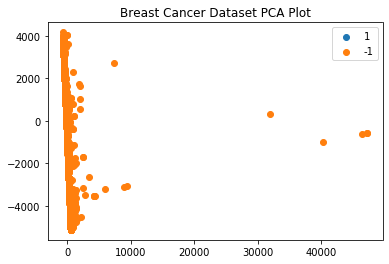

In [51]:
from sklearn.decomposition import PCA
#reducing the dimensions so that I can do a 2D-plot
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(cmt_train[train_features])

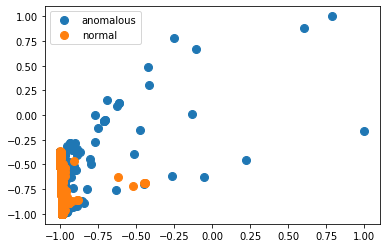

In [112]:
from sklearn.preprocessing import MinMaxScaler
default_scaler = MinMaxScaler(feature_range=(-1,1))

transformed = default_scaler.fit_transform(component_data)
transformed=pd.DataFrame(data=transformed, columns=["one", "two", "anomaly"])
groups = transformed.groupby('anomaly')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    label='normal' if name == 1 else "anomalous"
    ax.plot(group.one, group.two, marker='o', linestyle='', ms=8, label=label)
ax.legend()

plt.show()

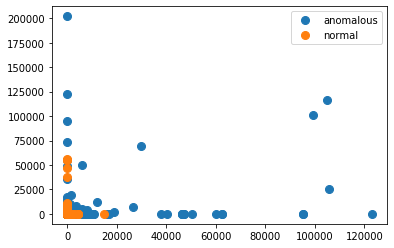

In [121]:
#plotting commits added vs commits removed

commits_added=pd.DataFrame(data=cmt_train[['cmt_added', 'cmt_removed', "anomaly"]])
groups = commits_added.groupby('anomaly')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    label='normal' if name == 1 else "anomalous"
    ax.plot(group.cmt_added, group.cmt_removed, marker='o', linestyle='', ms=8, label=label)
ax.legend()

plt.show()

In [119]:
cmt_train[['cmt_added', 'cmt_removed', "anomaly"]]

,cmt_added,cmt_removed,anomaly
0,0,0,1
1,10,3,1
2,12,14,1
3,17,1,1
4,17,19,1
5,2,1,1
6,0,0,1
7,0,0,1
8,0,0,1
9,3,8,1
